### Deployment Strategist Take-Home Exercise

## By Abigail Tovar

# Part 1. Data Cleansing & Exploratory Data Analysis

Let's choose a couple high level questions to answer in our analyses:

- 1. Which countries are the most frequently transacted for remittances?

- 2. What is the average transaction value for these countries?

- 3. Out of the total transaction volume, what share do the top 3 send agents have?

- 4. How many senders use verification among these sender agents?

- 5. What are the transaction size patterns across sender age groups?


/var/folders/xq/9fvhhn2d2gv4x1jjdwsdfb9r0000gn/T/ipykernel_29142/2019502060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


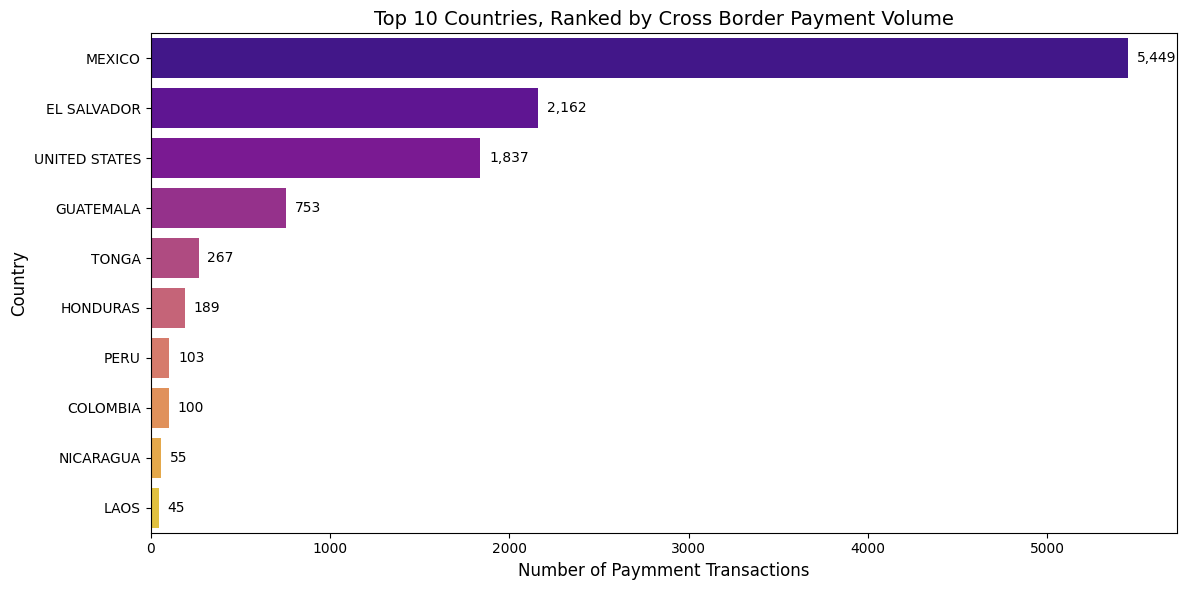

In [ ]:
#1. Analyze Cross Border Payment Transaction Frequencies

pay_ctry_counts = raw_data['Pay Country'].value_counts()

ctry_counts = pay_ctry_counts.rename_axis('Country').reset_index(name='Number of Paymment Transactions') 

# Filter for the top 10 countries
top_10_ctry = ctry_counts.sort_values(by='Number of Paymment Transactions', ascending=False).head(10)

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x='Number of Paymment Transactions', 
    y='Country', 
    data=top_10_ctry, 
    palette="plasma"
)

# Add labels to the bars
for index, value in enumerate(top_10_ctry['Number of Paymment Transactions']):
    ax.text(value + 50, index, f"{value:,}", va='center', fontsize=10)

# Add title and labels
plt.title('Top 10 Countries, Ranked by Cross Border Payment Volume', fontsize=14)
plt.xlabel('Number of Paymment Transactions', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()


/var/folders/xq/9fvhhn2d2gv4x1jjdwsdfb9r0000gn/T/ipykernel_29142/3849430797.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pay Country', y='Amount', data=top_ctry_amnts, palette="viridis",
/var/folders/xq/9fvhhn2d2gv4x1jjdwsdfb9r0000gn/T/ipykernel_29142/3849430797.py:17: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='Pay Country', y='Amount', data=top_ctry_amnts,


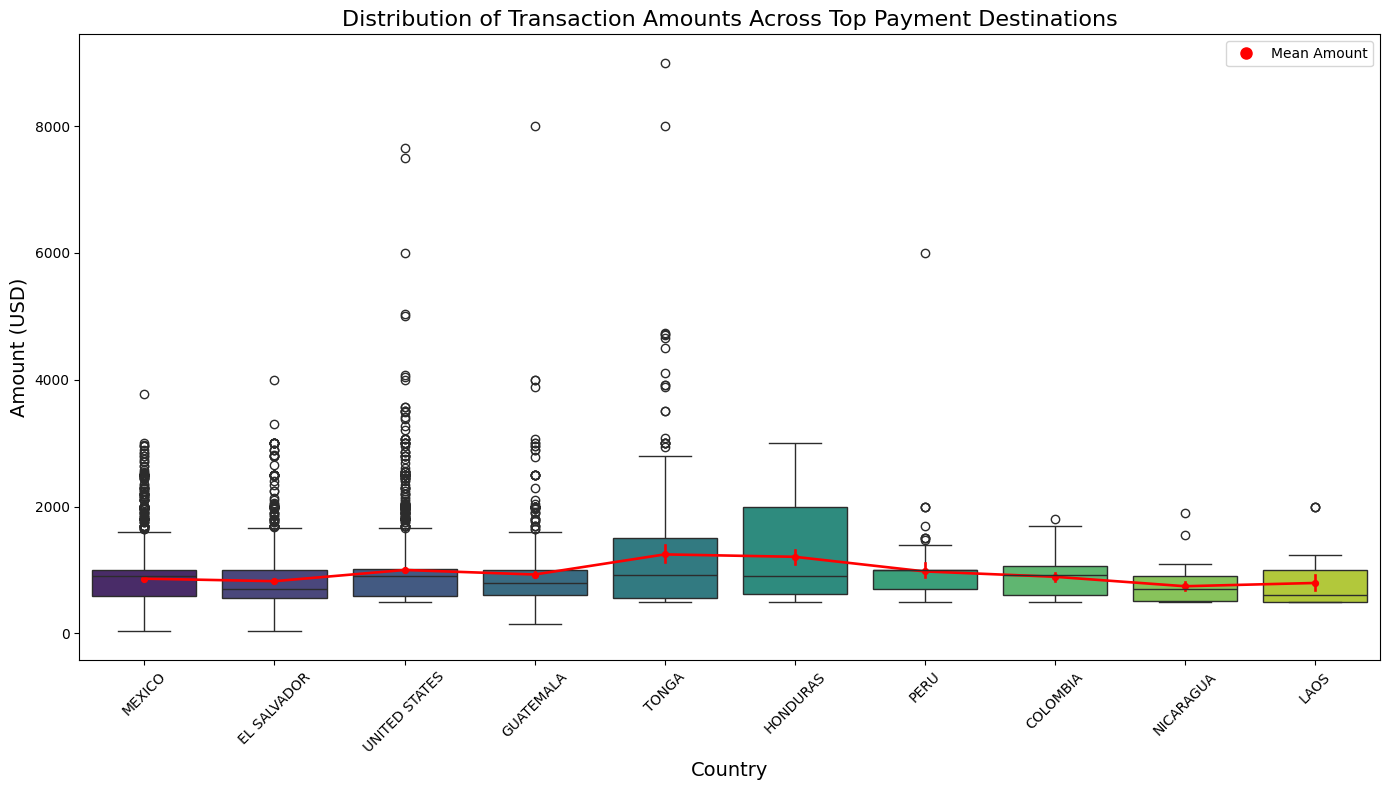

Transaction amount statistics by destination country:


,Pay Country,count,mean,median,min,max
0,COLOMBIA,100,892.770000,920.0,500.0,1800.0
1,EL SALVADOR,2162,823.139496,700.0,40.0,4000.0
2,GUATEMALA,753,928.383772,800.0,140.0,8000.0
3,HONDURAS,189,1207.595238,900.0,500.0,3000.0
4,LAOS,45,794.888889,600.0,500.0,2000.0
5,MEXICO,5449,862.969853,900.0,30.0,3771.0
6,NICARAGUA,55,743.454545,700.0,500.0,1900.0
7,PERU,103,977.033204,1000.0,500.0,6000.0
8,TONGA,267,1245.668951,921.0,500.0,9000.0
9,UNITED STATES,1837,999.791824,900.0,500.0,7650.0


In [ ]:
#2. Analyze the Cross Border Payment Transaction Volume in Top Countries

# Filter data for the list of countries we found in the previous step
top_ctry_list = top_10_ctry['Country'].tolist()
top_ctry_amnts = raw_data[raw_data['Pay Country'].isin(top_ctry_list)]

plt.figure(figsize=(14, 8))

# Create a boxplot for the distribution of transaction amounts to easily find outliers
sns.boxplot(x='Pay Country', y='Amount', data=top_ctry_amnts, palette="viridis", 
           order=top_ctry_list)
plt.title('Distribution of Transaction Amounts Across Top Payment Destinations', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Amount (USD)', fontsize=14)
plt.xticks(rotation=45)

# Add mean amount as points
sns.pointplot(x='Pay Country', y='Amount', data=top_ctry_amnts, 
              estimator=np.mean, color='red', markers='o', scale=0.7,
              order=top_ctry_list)  # Same correction here

# Add legend for mean
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='r', label='Mean Amount',
                  markerfacecolor='r', markersize=8, linestyle='None')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

# Show the mean, median, min, and max transaction amounts for each country
amount_stats = top_ctry_amnts.groupby('Pay Country')['Amount'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
print("Transaction amount statistics by destination country:")
display(amount_stats)



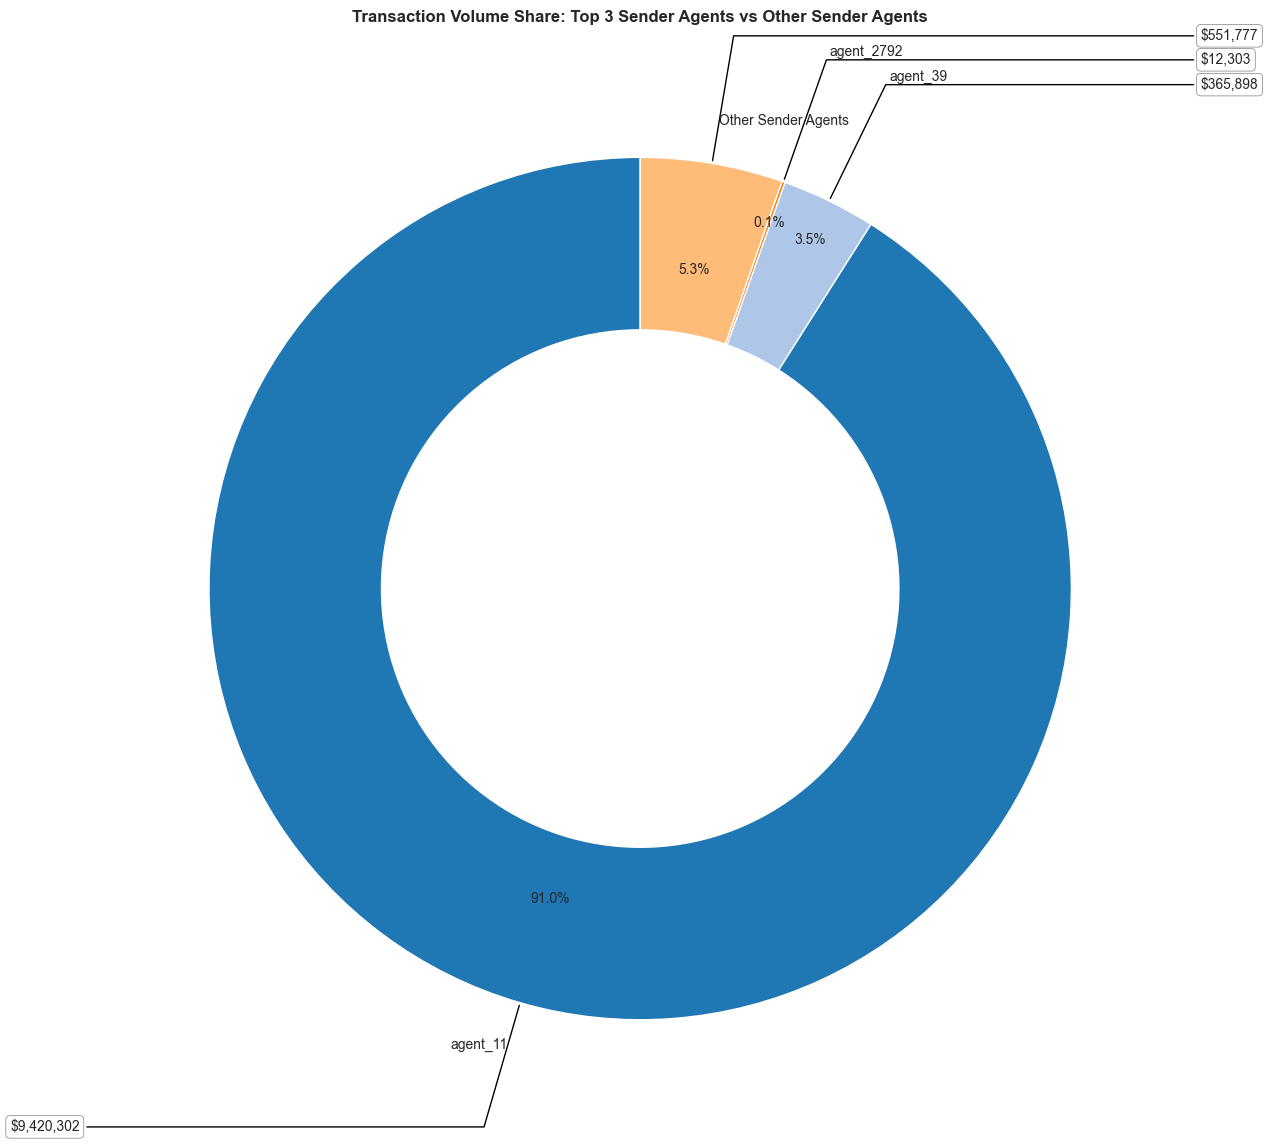

In [ ]:
#3. Analyze Transaction Volume Amongst the Top 3 Send Agents

# Calculate total of all transactions in dataset
total_txs_amnt = raw_data['Amount'].sum()

# Find the Top 3 Sender Agents by Transaction Amount
sender_agents = raw_data[['Send Agent Name', 'Amount']]
sender_agents_vol = sender_agents.groupby('Send Agent Name')['Amount'].sum().sort_values(ascending=False)
top_3_sender_agents = sender_agents_vol.head(3)

top_3_amount = top_3_sender_agents.sum()
others_amount = total_txs_amnt - top_5_amount

#  Set the labels for visualization
labels = top_3_sender_agents.index.tolist() + ['Other Sender Agents']
sizes = top_3_sender_agents.values.tolist() + [others_amount]
percentages = [f'{(x/total_txs_amnt)*100:.1f}%' for x in sizes]
colors = plt.cm.tab20.colors[:6] 

# Create donut chart and make it readable
fig, ax = plt.subplots(figsize=(14, 14))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.75,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'},
    labeldistance=1.1
)

for t, a in zip(texts, autotexts):
    if float(a.get_text().strip('%')) < 5:  # For small percentages
        t.set_position((1.2 * t.get_position()[0], 1.2 * t.get_position()[1]))
        a.set_position((1.2 * a.get_position()[0], 1.2 * a.get_position()[1]))

# Add annotations to help explain the data
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.5)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(f"${sizes[i]:,.0f}", xy=(x, y), xytext=(1.3*np.sign(x), 1.3*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title('Transaction Volume Share: Top 3 Sender Agents vs Other Sender Agents', pad=20, fontweight='bold')
plt.show()

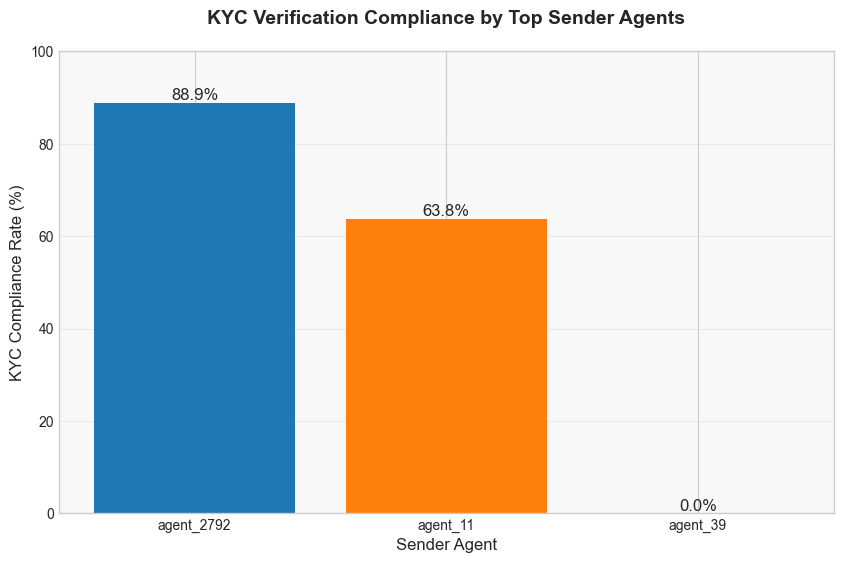

KYC Verification Numbers for Top 3 Sender Agents:
agent_11: 63.8% (6677 verified IDs out of 10468 total transactions)
agent_2792: 88.9% (16 verified IDs out of 18 total transactions)
agent_39: 0.0% (0 verified IDs out of 291 total transactions)


In [ ]:
#4. Analyze of KYC Verification for Top 3 Sender Agents

# Filter data for the top 3 sender agents we found in the previous step
top_3_agents = top_3_sender_agents.index.tolist()
top_3_data = raw_data[raw_data['Send Agent Name'].isin(top_3_agents)]

# Calculate verification rates
verification_rates = top_3_data.groupby('Send Agent Name')['Sender ID1 info'].mean().sort_values(ascending=False)

# Create visulization
plt.figure(figsize=(10, 6))
bars = plt.bar(verification_rates.index, verification_rates.values * 100,  color=['#1f77b4', '#ff7f0e', '#2ca02c'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

plt.ylim(0, 100)
plt.ylabel('KYC Compliance Rate (%)', fontsize=12)
plt.xlabel('Sender Agent', fontsize=12)
plt.title('KYC Verification Compliance by Top Sender Agents', pad=20, fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.show()

# Print raw numbers
print("KYC Verification Numbers for Top 3 Sender Agents:")
for agent, data in top_3_data.groupby('Send Agent Name'):
    verified = data['Sender ID1 info'].sum()
    total = len(data)
    pct = (verified / total) * 100
    print(f"{agent}: {pct:.1f}% ({verified} verified IDs out of {total} total transactions)")

<Figure size 1400x800 with 0 Axes>

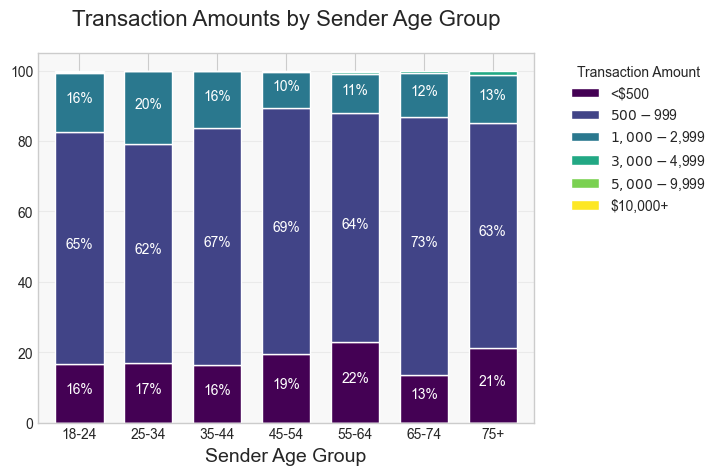

Transaction count and percentage by age group and send amount:

18-24: 325 total transactions
  <$500: 54 (16.6%)
  $500-$999: 214 (65.8%)
  $1,000-$2,999: 55 (16.9%)
  $3,000-$4,999: 1 (0.3%)
  $5,000-$9,999: 1 (0.3%)
  $10,000+: 0 (0.0%)

25-34: 1,358 total transactions
  <$500: 231 (17.0%)
  $500-$999: 843 (62.1%)
  $1,000-$2,999: 281 (20.7%)
  $3,000-$4,999: 2 (0.1%)
  $5,000-$9,999: 1 (0.1%)
  $10,000+: 0 (0.0%)

35-44: 2,192 total transactions
  <$500: 359 (16.4%)
  $500-$999: 1,476 (67.3%)
  $1,000-$2,999: 352 (16.1%)
  $3,000-$4,999: 4 (0.2%)
  $5,000-$9,999: 1 (0.0%)
  $10,000+: 0 (0.0%)

45-54: 2,515 total transactions
  <$500: 493 (19.6%)
  $500-$999: 1,752 (69.7%)
  $1,000-$2,999: 257 (10.2%)
  $3,000-$4,999: 10 (0.4%)
  $5,000-$9,999: 3 (0.1%)
  $10,000+: 0 (0.0%)

55-64: 1,618 total transactions
  <$500: 371 (22.9%)
  $500-$999: 1,050 (64.9%)
  $1,000-$2,999: 182 (11.2%)
  $3,000-$4,999: 10 (0.6%)
  $5,000-$9,999: 5 (0.3%)
  $10,000+: 0 (0.0%)

65-74: 484 total transactio

In [ ]:
#5. Analyze of Transaction Sizes Across Age Group 

# Create thresholds for age groups
age_data = raw_data.dropna(subset=['Sender Age']).copy()
age_data['Age Group'] = pd.cut(age_data['Sender Age'], bins=[18, 25, 35, 45, 55, 65, 75, 90],labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+'])
age_data['Amount Category'] = pd.cut(age_data['Amount'], bins=[0, 500, 1000, 3000, 5000, 10000, float('inf')], labels=['<$500', '$500-$999', '$1,000-$2,999', '$3,000-$4,999', '$5,000-$9,999', '$10,000+'])


pivot_age_amt = pd.pivot_table(age_data, values='Amount', index='Age Group', columns='Amount Category', aggfunc='count', fill_value=0)

# Calculate percentages for each age group
pct_age_amt = pivot_age_amt.div(pivot_age_amt.sum(axis=1), axis=0) * 100

# Create visulization
plt.figure(figsize=(14, 8))

pct_age_amt.plot(kind='bar', stacked=True, colormap='viridis', width=0.7, edgecolor='white', linewidth=1)

# Add percentage labels
for n, x in enumerate(pct_age_amt.index):
    for (amount_cat, pct) in zip(pct_age_amt.columns, pct_age_amt.loc[x]):
        if pct > 5:  # Only show labels for segments > 5% to avoid clutter
            # Calculate the middle position of each segment
            cum_pcts = np.cumsum(pct_age_amt.loc[x])
            y_pos = cum_pcts[amount_cat] - (pct/2)
            plt.text(n, y_pos, f'{int(pct)}%', ha='center', color='white')

plt.title('Transaction Amounts by Sender Age Group', fontsize=16, pad=20)
plt.xlabel('Sender Age Group', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.legend(title='Transaction Amount', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print raw numbers
print("Transaction count and percentage by age group and send amount:")
for age_group in age_amount_pivot.index:
    total = age_amount_pivot.loc[age_group].sum()
    print(f"\n{age_group}: {total:,} total transactions")
    for amount_cat in age_amount_pivot.columns:
        count = age_amount_pivot.loc[age_group, amount_cat]
        pct = age_amount_pivot.loc[age_group, amount_cat] / total * 100
        print(f"  {amount_cat}: {count:,} ({pct:.1f}%)")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
raw_data = pd.read_excel("data/data.xlsx")

# Clean the column names
raw_data.columns = raw_data.columns.str.strip()
raw_data.columns = raw_data.columns.str.rstrip('_') 

# Cast columms of dates to datetime objects for easy index
raw_data["Send DateTime"] = pd.to_datetime(raw_data["Send DateTime"])
raw_data["Pay DateTime"] = pd.to_datetime(raw_data["Pay DateTime"])

# Set view of dataframes to show all columns
pd.set_option('display.max_columns', None)

# Drop extra index column from conversion
raw_data = raw_data.drop('Unnamed: 0', axis=1)

print(raw_data.describe())

                       Send DateTime                   Pay DateTime  \
count                          11399                          11388   
mean   2018-04-17 01:23:11.153609984  2018-04-17 21:15:41.786090752   
min              2015-11-28 14:00:00            2015-11-28 15:15:00   
25%              2017-01-24 15:09:30            2017-01-24 19:59:00   
50%              2018-02-26 13:57:00            2018-02-26 19:33:00   
75%              2019-06-29 13:17:00            2019-06-29 23:30:45   
max              2020-11-25 19:38:00            2020-11-26 14:19:00   
std                              NaN                            NaN   

             Amount  Sender ID1 info  Payee ID1 info   Sender Age    Payee Age  
count  11399.000000     11399.000000    11399.000000  8579.000000  8016.000000  
mean     909.937714         0.626897        0.851478    47.064227    44.898578  
min       30.000000         0.000000        0.000000    18.000000    12.000000  
25%      589.770000         0.000000

# Key Findings from AML Analysis

## Demographic Anomalies
- **Sender age range**: 18 – 121  
- **Payee age range**: 12 – 121  
  - *These extreme ages suggest potential fraudulent information provided*

## Transaction Patterns
- **All transactions** are under $10,000  
  - *Matches the Currency Transaction Report (CTR) threshold, indicating possible "structuring" to avoid regulatory reporting*

## Geographic Focus
- **Primary destination country**: Mexico  
- **Top 10 destinations**: Dominated by Latin American countries  
  - *Supports suspected ties to Mexican drug cartels*

## Compliance Gaps
- **Sender ID verification**: Missing for a significant portion of transactions  
  - *High-risk pattern for money laundering operations*

## Part Two: Create and Apply AML Risk Indicators for Risk Scoring System

We will evaluate user profiles based on using a risk scoring system that analyzes their transaction patterns with the AML indicators we created.

### Risk Scoring System Metrics:

- ### Risk #1 Transaction Speed 

    **Hypothesis**:  a short time between the wiring and receiving of a transaction may be suspicious because the quick reception of a transfer means that the receiver was informed that the transaction would be coming through (these transactions are being wired and received in person). According to Stripe Domestic wire transfers can be completed within one business and International wire transfers typically take one to five business day we can use this information to create thresholds and spot anamolies in processing time in the data [1].

    **Thresholds**:
        - Domestic: <1 business day
        - International: <24 hours (vs typical 1-5 days)

- ### Risk #2:  Transaction Frequency

    **Hypothesis**: Commonly in money laundering, large sums are broken up into small transactions, in this case a suspect may have a spike in the amount of deposits they receive or transfers they make. Comparing transaction frequency of a suspect to the average transaction frequency amongst all individuals will show the outliers where transaction behavior is abnormal.

    **Thresholds**: 
        - top 5% of avg. transaction frequency by month

- ### Risk #3: Amount Sent/Amount Received

    **Hypothesis**: If this ratio is close to 1, or 1, this may be a sign of "integration" (when the money comes back to the original source after moving through various accounts during layering).

    **Thresholds**: 
        - `(Amount Sent / Amount Received)` = 1

- ### Risk #4: Number of Agents Used 

    **Hypothesis**: If the suspect is using many sender agents to initiate transactions raising a red flag as using many agents can help hide the trail of transactions and make it more difficult to trace the origin of the funds and avoid CTRs.

    **Thresholds**: 
        - >2 unique `Send Agent Name` values per sender

- ### Risk #5: Number of Countries Transacted With

    **Hypothesis**: If a suspect has had transactions spanning multiple countries this may be a red flag as the the weaker ties are for each country and this may be an attempt at "structuring" across borders.

    **Thresholds**: 
        - >= 2 unique `Pay Country` per sender (this accounts for business)

### Risk Scoring Methodology:
- Each triggered risk flag adds **+1** to the sender's `risk_score` (range: 0-5)

### Common Laundering Patterns
Pattern	                    Flags Triggered
Smurfing	                Risk 2#, Risk #4 
Layering	                Risk #1, Risk #3
Cross-border structuring	Risk #2, Risk #5

In [98]:
# Risk 1: Transaction Processing Speed
# Create a feature for payment type
raw_data['Payment Type'] = raw_data.apply(lambda row: 'International' if row['Send Country'] != row['Pay Country'] else 'Domestic', axis=1)

# Calculate the domestic payments and international payments
dom_pymts = raw_data[raw_data['Payment Type'] == 'Domestic'].copy()
intl_pymts = raw_data[raw_data['Payment Type'] == 'International'].copy()

# Calculate the time spent on each payment
dom_pymts['Time Spent Hrs'] = (dom_pymts['Pay DateTime'] - dom_pymts['Send DateTime']).dt.total_seconds() / 3600
intl_pymts['Time Spent Hrs'] = (intl_pymts['Pay DateTime'] - intl_pymts['Send DateTime']).dt.total_seconds() / 3600

# Define thresholds and categorize in one line each
dom_pymts['Time Category'] = pd.cut(dom_pymts['Time Spent Hrs'], bins=[-float('inf'), 1, 6, 12, 24, float('inf')], labels=['Very Low (< 1 hr)', 'Low (1-6hrs)', 'Medium (6-12hrs)', 'High (12-24hrs)', 'Very High (>24hrs)'])
intl_pymts['Time Category'] = pd.cut(intl_pymts['Time Spent Hrs'], bins=[-float('inf'), 24, 48, 72, 120, float('inf')], labels=['Very Low (<1 day)', 'Low (1-2 days)', 'Medium (2-3 days)', 'High (3-5 days)', 'Very High (>5 days)'])

all_pymt_types = pd.concat([dom_pymts, intl_pymts], ignore_index=True)

# Pivot table showing both count AND average processing time
process_times = (all_pymt_types.groupby(['Payment Type', 'Time Category']).agg(Count=('Time Spent Hrs', 'count'), Avg_Time_Hrs=('Time Spent Hrs', 'mean')))
process_times['Avg_Time_Hrs'] = process_times['Avg_Time_Hrs'].round(2)

# Count "Very Low" and Low transactions per sender
low_process_times = all_pymt_types[all_pymt_types['Time Category'].isin(['Very Low (< 1 hr)'])]
low_process_times = low_process_times.groupby('Sender Name').agg(Count=('Time Category', 'count'), Avg_Time_Hrs=('Time Spent Hrs', 'mean')).reset_index()

# Flag senders with processing speeds that are faster than average for Very Low Category speed transactions
flagged_senders = all_pymt_types[all_pymt_types['Time Category'].notna() & all_pymt_types['Time Category'].astype(str).str.startswith(('Very Low'))].copy()

# Add flag to original dataset
raw_data['risk_1_flag'] = raw_data['Sender Name'].isin(flagged_senders).astype(int)


In [96]:
# Risk 2: Transaction Frequency

def get_frequencies(df, user_col, datetime_col):
    """
    Calculates the average number of transactions for a sender/payee by month.
    """
    # Drop nan values in the datetime column to avoid errors
    df = df.dropna(subset=[datetime_col])  # Drop rows where datetime is NaT
    df = df.set_index(datetime_col)

    # Create a count of transaction window by month
    monthly_counts = (df.groupby(user_col).resample('M').size().reset_index(name='Monthly_Tx_Count'))

    # Find the average transactions in each window
    monthly_avg = (monthly_counts.groupby(user_col)['Monthly_Tx_Count'].mean().reset_index(name='Avg_Monthly_Tx'))

    return monthly_avg
# Calculate the average transaction frequency for each sender
sender_monthly_avg = get_frequencies(raw_data, 'Sender Name', 'Send DateTime')

# Flag senders in the top 5% of avg. transaction frequency in a month
threshold_95 = sender_monthly_avg['Avg_Monthly_Tx'].quantile(0.95)
sender_outliers  = sender_monthly_avg[sender_monthly_avg['Avg_Monthly_Tx'] > threshold_95]['Sender Name'].tolist()

# Create a feature in original dataset that flags the sender if they are a high frequency sender
raw_data['risk_2_flag'] = raw_data['Sender Name'].isin(sender_outliers)


In [94]:
# Risk 3: Amount of Transacted Countries

# Calculate the number of distinct countries for each sender
sndr_ctry_cnt = raw_data.groupby('Sender Name')['Pay Country'].nunique().reset_index(name='Distinct_Countries')
# Filter for senders who have transacted with more than 2 countries
sndr_ctry_cnt['txs_cntry_risk'] = (sndr_ctry_cnt['Distinct_Countries'] >= 2).astype(int)

# Create a feature in original dataset that flags the sender if they have transacted w/ more than 2 countries
raw_data['risk_3_flag'] = raw_data['Sender Name'].map(sndr_ctry_cnt.set_index('Sender Name')['txs_cntry_risk'])


In [ ]:
# Risk 4: Number of Send Agents Used

# Calculate the number of distinct send agents used for each sender
sndr_agents = raw_data.groupby('Sender Name')['Send Agent Name'].nunique().reset_index(name='Unique_Agents')
# Filter for senders who have transacted with more than avg count of send agents
high_agent_senders = sndr_agents[sndr_agents['Unique_Agents'] > sndr_agents['Unique_Agents'].mean()]['Sender Name'].tolist()

# Create a feature in original dataset that flags the sender if they have transacted w/ more than the avg number of send agents
raw_data['risk_4_flag'] = raw_data['Sender Name'].isin(high_agent_senders).astype(int)



In [79]:

# Risk 5: Circular Transactions

# Calculate the total amount sent and received for each sender and payee
sent_amts = raw_data.groupby('Sender Name')['Amount'].sum().reset_index().rename(columns={'Amount': 'Total_Sent'})
recv_amts = raw_data.groupby('Payee Name')['Amount'].sum().reset_index().rename(columns={'Amount': 'Total_Received'})

# Find the equal amounts of sent and received for a sender/payee match
circ_tx = pd.merge(sent_amts, recv_amts, left_on='Sender Name', right_on='Payee Name', how='inner')
circular_senders = circ_tx[circ_tx['Total_Sent'] == circ_tx['Total_Received']]['Sender Name'].tolist()

# Create a feature in original dataset that flags the sender if have had circular transactions
raw_data['risk_5_flag'] = raw_data['Sender Name'].isin(circular_senders).astype(int)



In [100]:
# Create a list of risk flags
risk_flgs = [
    'risk_1_flag',        # 1 if suspicious transactions processing speed
    'risk_2_flag',        # 1 if abnormal amount of txs in a month
    'risk_3_flag',        # 1 if has sent and received the same amount
    'risk_4_flag',        # 1 if used multiple agents
    'risk_5_flag'         # 1 if multi-country transactions
]

# Calculate the risk score for each row
raw_data['risk_score'] = raw_data[risk_flgs].sum(axis=1)

# Identify high-risk senders who have a score >= 2
high_risk_senders = (raw_data.groupby('Sender Name')['risk_score'].max().reset_index().query('risk_score >= 2').sort_values('risk_score', ascending=False))

# Calculate total transaction amounts for high-risk senders
sender_tx_sum = (raw_data[raw_data['Sender Name'].isin(high_risk_senders['Sender Name'])].groupby('Sender Name')['Amount'].sum().reset_index(name='Total_Amount (USD)').sort_values('Total_Amount (USD)', ascending=False))

# Format the totals in dollar format
sender_tx_sum['Total_Amount (USD)'] = sender_tx_sum['Total_Amount (USD)'].apply(lambda x: f"${x:,.2f}")


print("\nShort list of high-risk senders:")
display(high_risk_senders)

print("\nTotal transaction amounts by high-risk sender:")
display(sender_tx_sum)



Short list of high-risk senders:


,Sender Name,risk_score
1,name_10,2
1520,name_2367,2
2805,name_806,2
2739,name_747,2
2555,name_581,2
2530,name_559,2
2416,name_456,2
2322,name_371,2
2120,name_2907,2
2007,name_2805,2



Total transaction amounts by high-risk sender:


,Sender Name,Total_Amount (USD)
0,name_10,"$370,671.15"
5,name_119,"$53,945.00"
12,name_195,"$39,980.00"
3,name_1131,"$29,670.00"
17,name_255,"$24,076.00"
2,name_1114,"$16,400.00"
18,name_2748,"$14,803.00"
20,name_2771,"$14,600.00"
4,name_1143,"$9,060.00"
22,name_2805,"$8,000.00"
